In [4]:
# html_test.html에서 소스 코드를 읽어옴
with open('jtpy.html', 'r', encoding = 'utf-8') as f: # 'r' 읽기 모드로 오픈
    html = f.read() # f.read()는 파일의 전체 내용을 문자열로 읽어오는 메서드
    # with 문의 컨텍스트 내에서 실행(들여쓰기... 코드 블록을 구분)

# open : Python 내장 함수로, 별도의 패키지 임포트 없이 사용 (설치 필요 없음)
   # Python의 기본 입출력(I/O) 기능을 제공하는 내장 라이브러리인 io 모듈에 속함. 파일을 열고 읽거나 쓰기 위한 기능 제공
   # with 키워드와 함께 사용, 파일 작업이 완료된 후 자동으로 파일을 닫아 줌

In [5]:
# 소스 코드 출력
# print(html)

# 책 제목 <meta name="title" content="Do it! 점프 투 파이썬">
# 저자 <meta name="author" content="박응용 저">
# 출판사
# 평점
# 할인률
# 출간일
# 판매일

## BeautifulSoup 클래스 사용하기

In [19]:
from bs4 import BeautifulSoup
import requests

url = "https://www.yes24.com/Product/Goods/61289620"

re = requests.get(url)

In [21]:
soup=BeautifulSoup(re.text, 'lxml') #  BeautifulSoup 클래스의 인스턴스를 생성
       # html : 파싱 대상(HTML 문서의 내용을 담고 있는 변수),
       # lxml': 사용할 파서(parser)의 종류 지정 (xml or html)


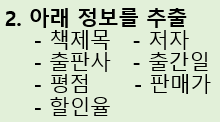

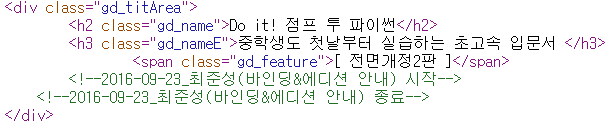<div class="gd_titArea">

In [24]:
print("책제목 : ",soup.findAll("h2", attrs={"class":"gd_name"})[0].text)
print("출판사 : ",soup.findAll("span", attrs={"class":"gd_pub"})[0].text)
print("저자   : ",soup.findAll("span", attrs={"class":"gd_auth"})[0].text.strip())
print("평점   : ",soup.findAll("em", attrs={"class":"yes_b"})[0].text)
print("할인률 : ",soup.findAll("td")[1].text.split("(")[1].split(")")[0])
print("출간일 : ",soup.findAll("span", attrs={"class":"gd_date"})[0].text)
print("판매가 : ",soup.findAll("em", attrs={"class":"yes_m"})[0].text)



책제목 :  데니스 홍, 상상을 현실로 만드는 법
출판사 :  인플루엔셜
저자   :  데니스 홍 저
평점   :  9.8
할인률 :  10% 할인
출간일 :  2018년 06월 20일
판매가 :  15,800원


### 태그의 이름을 이용해서 태그 찾기


title 태그 찾기

In [8]:
soup.title

# title_tag = soup.find('title')
# print(title_tag)

<title>Do it! 점프 투 파이썬 - 예스24 </title>

In [9]:
soup.title.text  # title 태그의 텍스트 내용을 출력


'Do it! 점프 투 파이썬 - 예스24 '

### find() 또는 find_all() 함수 사용하기

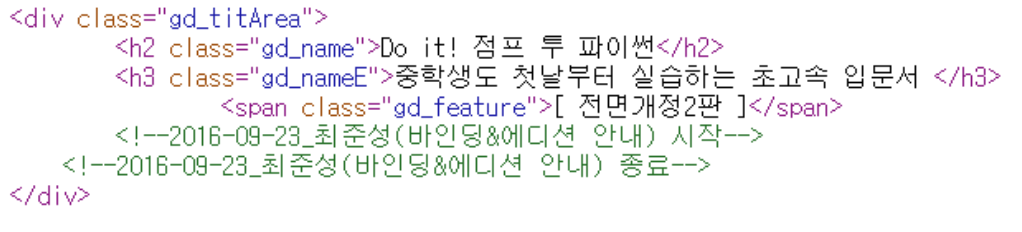

In [10]:
# 태그의 이름을 찾고자 하는 태그의 조건으로 입력
# <div class="gd_titArea">
d1 = soup.find('div',attrs={'class':'gd_titArea'})

In [11]:
d1.contents

['\n',
 <h2 class="gd_name">Do it! 점프 투 파이썬</h2>,
 '\n',
 <h3 class="gd_nameE">중학생도 첫날부터 실습하는 초고속 입문서 </h3>,
 '\n',
 <span class="gd_feature">[ 전면개정2판 ]</span>,
 '\n',
 '2016-09-23_최준성(바인딩&에디션 안내) 시작',
 '\n',
 '2016-09-23_최준성(바인딩&에디션 안내) 종료',
 '\n']